In [5]:
!pip install celluloid

In [6]:
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from celluloid import Camera
from IPython.display import HTML

In [7]:
# Criação da pasta que irá conter os dados (train/test).
from pathlib import Path

# Criar diretório que irá receber os dados "Data".
data_path = Path("data/")

# Criar o diretório para receber as imagens
image_path = data_path / "datasets"

# Verificar se o diretório já existe, se não criar um.
if image_path.is_dir():
  print(f"O diretório {image_path} ja existe, pule para o download dos dados...")
else:
  print(f"O diretório {image_path} não existe, criando....")
  image_path.mkdir(parents=True, exist_ok=True)
  print("Diretório criado com sucesso!")

O diretório data/datasets não existe, criando....
Diretório criado com sucesso!


In [9]:
import shutil
import zipfile
import os
from google.colab import drive
drive.mount('/content/drive')

# Criar um caminho para o arquivo
origem = '/content/drive/MyDrive/Colab Notebooks/Image_Medical/Seção/Seção 12/Task03_Liver_rs.zip'

# Caminho que o arquivo irá ser armazenado
destino = image_path / "datasets.zip"

# Copiar o arquivo para a pasta
shutil.copy(origem, destino)
print("Copiado com sucesso!")

# Unzip
with zipfile.ZipFile(image_path / "datasets.zip", "r") as zip_ref:
  print("Descompactando o arquivo.....")
  zip_ref.extractall(image_path)
  os.remove(image_path / "datasets.zip")
  print("Arquivo descompactado com sucesso!")

# Apagar a pasta do drive.
drive.flush_and_unmount()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Copiado com sucesso!
Descompactando o arquivo.....
Arquivo descompactado com sucesso!


In [10]:
root = Path("/content/data/datasets/Task03_Liver_rs/imagesTr")
label = Path("/content/data/datasets/Task03_Liver_rs/labelsTr")

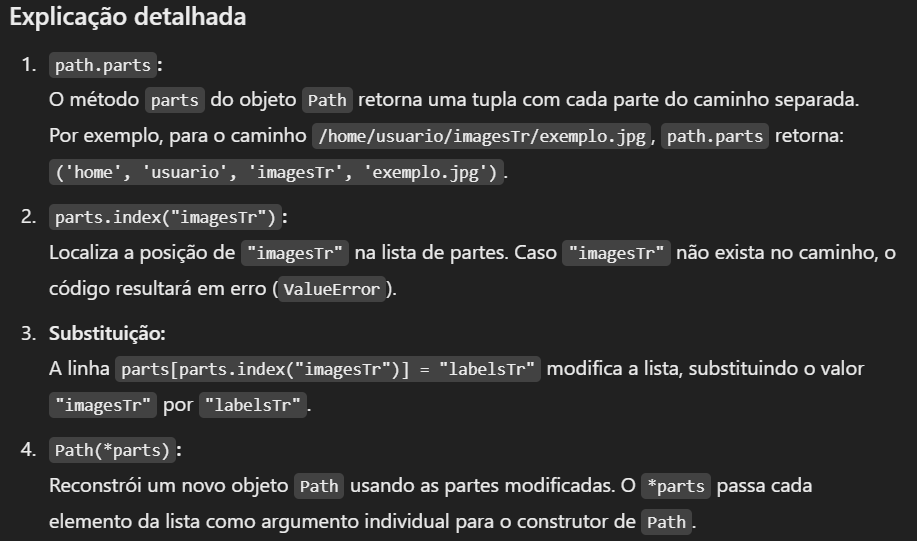

In [11]:
def change_img_to_label_path(path):
    """
    Função para substituir uma parte específica de um caminho de arquivo.
    Neste caso, substitui 'imagesTr' por 'labelsTr' no caminho fornecido.

    Args:
        path (Path): Um objeto Path representando o caminho original do arquivo.

    Returns:
        Path: Um novo objeto Path com 'imagesTr' substituído por 'labelsTr'.
    """
    # Converte o objeto Path em uma lista de partes do caminho (diretórios/subdiretórios)
    parts = list(path.parts)

    # Encontra o índice de "imagesTr" na lista e substitui por "labelsTr"
    parts[parts.index("imagesTr")] = "labelsTr"

    # Reconstrói o objeto Path a partir das partes modificadas e o retorna
    return Path(*parts)


**Explicação**

**`root.glob("liver*"):`**

O método glob retorna um iterador com os caminhos que correspondem ao padrão especificado ("liver*").
Nesse caso, está procurando arquivos ou diretórios no diretório root cujo nome começa com "liver".

**`list(...)[0]:`**

Converte o iterador retornado por glob em uma lista e seleciona o primeiro item dessa lista. Isso pressupõe que ao menos um arquivo correspondente existe, caso contrário, ocorrerá um erro de índice.

**`change_img_to_label_path(sample_path):`**

Chama a função definida anteriormente para modificar o caminho da imagem (sample_path), substituindo "imagesTr" por "labelsTr". Isso é útil, por exemplo, em pipelines de aprendizado de máquina onde os arquivos de rótulo (labels) seguem um padrão similar aos arquivos de imagem, mas estão em pastas ou caminhos diferentes.

In [15]:
# Obtém o primeiro caminho que corresponde ao padrão "liver*" no diretório raiz (root)
# `glob` busca por arquivos ou diretórios que combinam com o padrão fornecido.
# Por exemplo, "liver*" pode encontrar arquivos como "liver001.nii.gz" ou "liver_sample.png".
sample_path = list(root.glob("liver*"))[0]

# Converte o caminho encontrado, substituindo "imagesTr" por "labelsTr" usando a função change_img_to_label_path
# Isso gera um caminho correspondente para o rótulo associado à imagem.
sample_path_label = change_img_to_label_path(sample_path)

**Explicação Detalhada**

`nib.load(sample_path):`

nib refere-se à biblioteca nibabel, frequentemente usada para manipular arquivos de neuroimagem no formato NIfTI (.nii ou .nii.gz).
A função load carrega o arquivo localizado em sample_path e retorna um objeto NIfTI.

`get_fdata():`

Extrai os dados volumétricos do objeto NIfTI como um array NumPy.
Para imagens médicas, isso pode representar intensidades de voxel (cubo mínimo de uma imagem 3D).

`sample_path_label:`

Este é o caminho para o arquivo de rótulo (label), que contém a segmentação ou anotação para a imagem médica.

`.astype(int):`

Garante que os valores no array mask sejam inteiros.
Isso é importante porque os rótulos de segmentação geralmente correspondem a valores discretos que identificam diferentes classes ou estruturas (por exemplo, 0 para fundo, 1 para fígado, etc.).

In [16]:
# Carrega os dados do arquivo de imagem médica (no formato NIfTI) especificado em sample_path.
# `nib.load` é uma função da biblioteca nibabel usada para carregar arquivos NIfTI.
# `get_fdata()` retorna os dados volumétricos como um array NumPy.
ct = nib.load(sample_path).get_fdata()

# Carrega os dados do arquivo de rótulo (label) correspondente, especificado em sample_path_label.
# `astype(int)` converte os dados do rótulo para o tipo inteiro, pois rótulos geralmente representam classes discretas.
mask = nib.load(sample_path_label).get_fdata().astype(int)

In [17]:
ct.shape

(256, 256, 41)

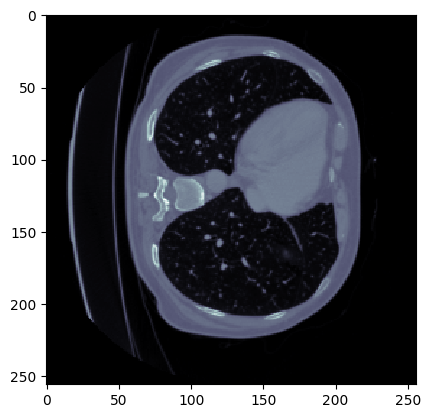

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera  # Biblioteca para criar animações

# Configura a figura e a câmera para capturar os frames da animação
fig = plt.figure()
camera = Camera(fig)

# Loop através de cada fatia ao longo do eixo z (terceira dimensão do volume)
for i in range(ct.shape[2]):
    # Exibe a imagem da fatia da tomografia (usando cmap 'bone' para tons de cinza)
    plt.imshow(ct[:, :, i], cmap='bone', interpolation='none')

    # Cria uma máscara para sobrepor à imagem (ignora os valores iguais a 0)
    mask_ = np.ma.masked_where(mask[:, :, i] == 0, mask[:, :, i])

    # Sobrepõe a máscara na imagem com transparência (alpha)
    plt.imshow(mask_, alpha=0.5, interpolation='none')

    # Captura o frame para a animação
    camera.snap()

# Cria a animação a partir dos frames capturados
animation = camera.animate()

# Exibe a animação (ou salve-a com animation.save('animation.mp4'))
plt.show()


In [25]:
HTML(animation.to_html5_video())

In [26]:
import torch

In [28]:
class DoubleConv(torch.nn.Module):
    """
    Classe auxiliar que implementa as convoluções intermediárias.
    Essa classe realiza duas operações de convolução seguidas, com ReLU entre elas.
    """
    def __init__(self, in_channels, out_channels):
        """
        Inicializa a classe com as camadas de convolução.

        Parâmetros:
        - in_channels: número de canais de entrada (como a profundidade da imagem).
        - out_channels: número de canais de saída após a convolução.
        """
        super().__init__()

        # Definindo as camadas de convolução
        self.step = torch.nn.Sequential(
            # Primeira convolução: aplica uma convolução 2D com kernel 3x3 e padding de 1
            torch.nn.Conv2d(in_channels, out_channels, 3, padding=1),
            torch.nn.ReLU(),  # Função de ativação ReLU após a convolução
            # Segunda convolução: aplica outra convolução 2D com kernel 3x3 e padding de 1
            torch.nn.Conv2d(out_channels, out_channels, 3, padding=1),
            torch.nn.ReLU()  # Função de ativação ReLU após a segunda convolução
        )

    def forward(self, X):
        """
        Passa os dados de entrada X pela sequência de convoluções.

        Parâmetro:
        - X: tensor de entrada (por exemplo, uma imagem ou um lote de imagens).

        Retorna:
        - Resultado da aplicação das duas convoluções e funções ReLU.
        """
        return self.step(X)
